# Activity 1.2 : Training Neural Networks


Hernandez, Eujean Marie T. <br> CPE32S8

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/drive/MyDrive/Data Science 3/HOA2/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
688,1,140,74,26,180,24.1,0.828,23,0
383,1,90,62,18,59,25.1,1.268,25,0
421,2,94,68,18,76,26.0,0.561,21,0
13,1,189,60,23,846,30.1,0.398,59,1
589,0,73,0,0,0,21.1,0.342,25,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                108       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 26ms/step - loss: 0.7255 - accuracy: 0.4531 - val_loss: 0.6979 - val_accuracy: 0.4115
Epoch 2/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.5052 - val_loss: 0.6789 - val_accuracy: 0.4844
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6859 - accuracy: 0.5590 - val_loss: 0.6628 - val_accuracy: 0.5729
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.5955 - val_loss: 0.6489 - val_accuracy: 0.6354
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6493 - val_loss: 0.6367 - val_accuracy: 0.6823
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6875 - val_loss: 0.6260 - val_accuracy: 0.6875
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6357 - accuracy: 0.6979 - val_loss: 0.6163 - val_accuracy: 0.7031
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.


y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)


6/6 [==============================] - 0s 4ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.52274054],
       [0.8235725 ],
       [0.30101192],
       [0.22236687],
       [0.17168474],
       [0.5136893 ],
       [0.03532889],
       [0.3851152 ],
       [0.89709306],
       [0.15401416]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.734
roc-auc is 0.817


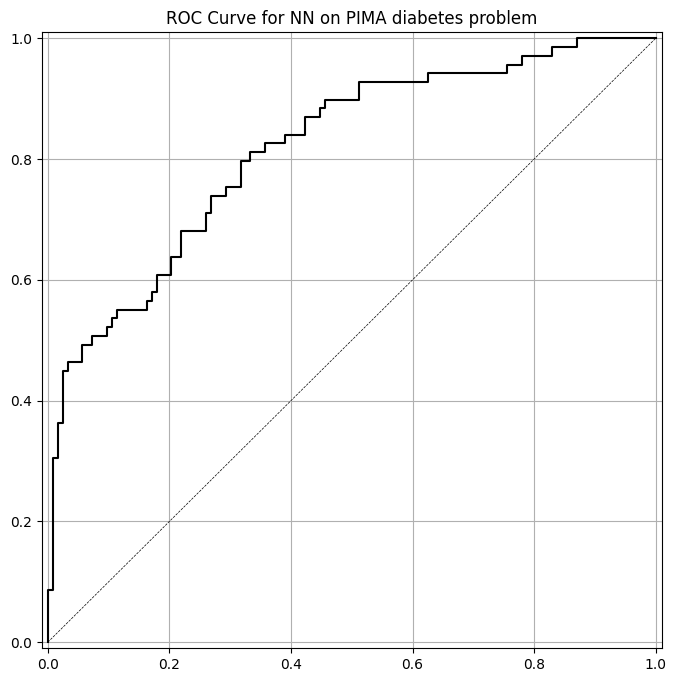

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

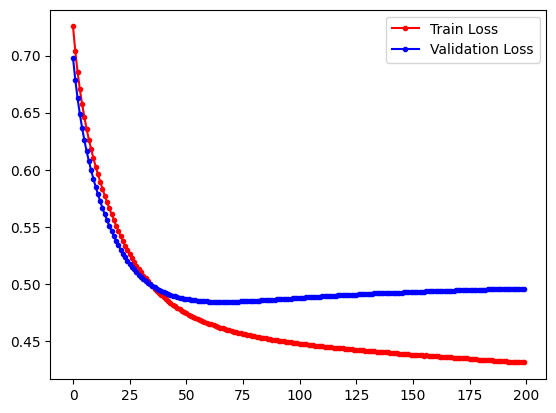

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

**At first both train loss and validation loss is decreasing indicating that the model effectively learning. However, the validation loss gap with train loss started to widen the gap from .50 onwards, which suggest that the model is starting to overfit the training set**

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

Build a model with two hidden layers, each with 6 nodes

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science 3/HOA2/happydata.csv")
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [ ]:
df.dtypes

infoavail        int64
housecost        int64
schoolquality    int64
policetrust      int64
streetquality    int64
ëvents           int64
happy            int64
dtype: object

In [ ]:
X = df.iloc[:, :-1].values
y = df["happy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [ ]:
model_2  = Sequential([
    Dense(6, input_shape=(6,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 42        
                                                                 
 dense_25 (Dense)            (None, 6)                 42        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Use a learning rate of .003 and train for 1500 epochs

In [ ]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
4/4 [==============================] - 1s 73ms/step - loss: 0.6805 - accuracy: 0.5794 - val_loss: 0.6786 - val_accuracy: 0.5000
Epoch 2/1500
4/4 [==============================] - 0s 14ms/step - loss: 0.6764 - accuracy: 0.5981 - val_loss: 0.6768 - val_accuracy: 0.5000
Epoch 3/1500
4/4 [==============================] - 0s 20ms/step - loss: 0.6720 - accuracy: 0.5981 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 4/1500
4/4 [==============================] - 0s 14ms/step - loss: 0.6677 - accuracy: 0.5981 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 5/1500
4/4 [==============================] - 0s 19ms/step - loss: 0.6636 - accuracy: 0.5981 - val_loss: 0.6719 - val_accuracy: 0.5000
Epoch 6/1500
4/4 [==============================] - 0s 18ms/step - loss: 0.6598 - accuracy: 0.6168 - val_loss: 0.6708 - val_accuracy: 0.5000
Epoch 7/1500
4/4 [==============================] - 0s 15ms/step - loss: 0.6566 - accuracy: 0.6355 - val_loss: 0.6701 - val_accuracy: 0.5278
Epoch 8/1500


In [ ]:
print(run_hist_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Graph the trajectory of the loss functions, accuracy on both train and test set

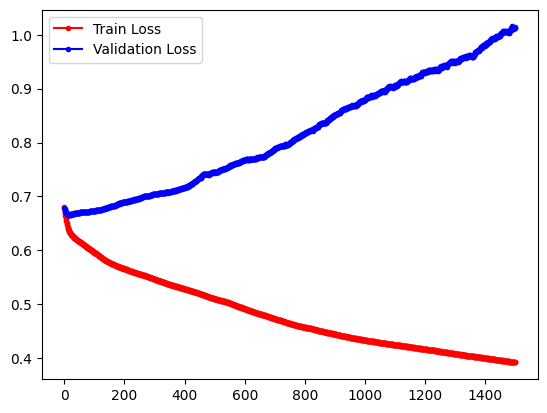

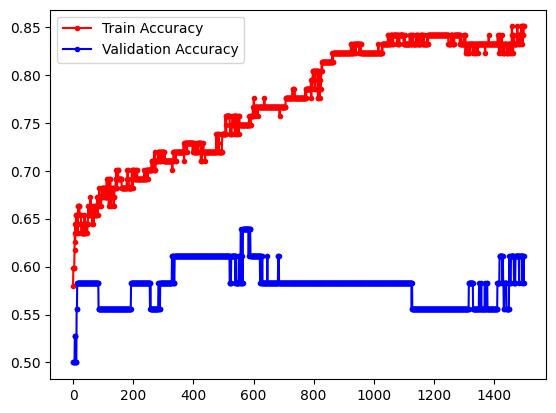

In [ ]:
#loss
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#accuracy

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()


Plot the roc curve for the predictions

In [ ]:
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Happy data set'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


accuracy is 0.583
roc-auc is 0.591


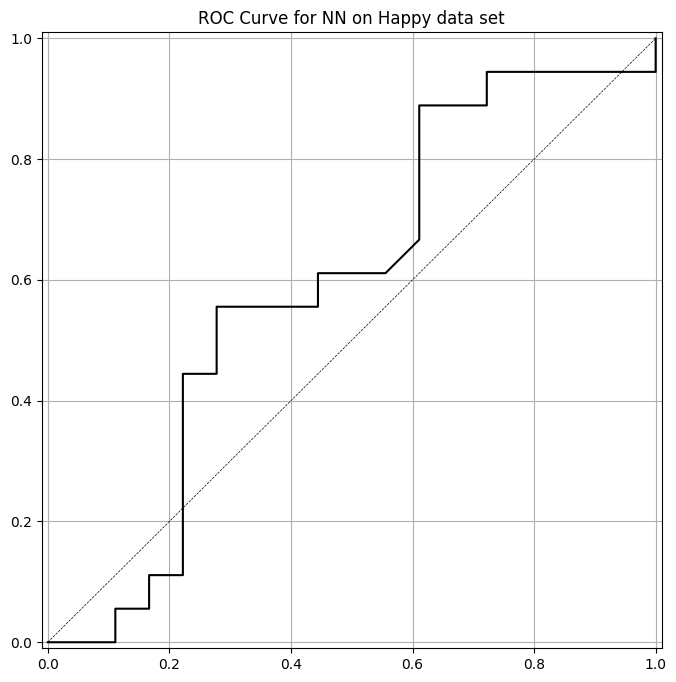

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

Use different learning rates, numbers of epochs, and network structures.


In [ ]:
# Network Structures

model_2 = Sequential([
    Dense(12, input_shape=(6,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid")
])


In [ ]:
model_2.compile(SGD(learning_rate=0.02), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 82ms/step - loss: 0.6825 - accuracy: 0.5794 - val_loss: 0.7233 - val_accuracy: 0.5556
Epoch 2/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6817 - accuracy: 0.5794 - val_loss: 0.7234 - val_accuracy: 0.5556
Epoch 3/500
4/4 [==============================] - 0s 19ms/step - loss: 0.6808 - accuracy: 0.5794 - val_loss: 0.7239 - val_accuracy: 0.5556
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 0.6797 - accuracy: 0.5794 - val_loss: 0.7237 - val_accuracy: 0.5556
Epoch 5/500
4/4 [==============================] - 0s 19ms/step - loss: 0.6787 - accuracy: 0.5794 - val_loss: 0.7239 - val_accuracy: 0.5278
Epoch 6/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6779 - accuracy: 0.5888 - val_loss: 0.7235 - val_accuracy: 0.5278
Epoch 7/500
4/4 [==============================] - 0s 19ms/step - loss: 0.6770 - accuracy: 0.5794 - val_loss: 0.7234 - val_accuracy: 0.5000
Epoch 8/500
4/4 [===

Plot the results of training and validation loss using different learning rates, number of epochs and network structures


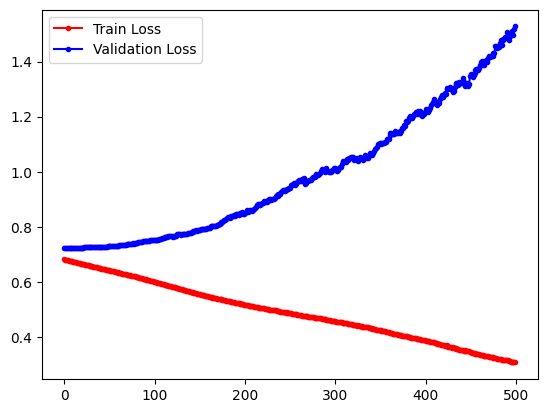

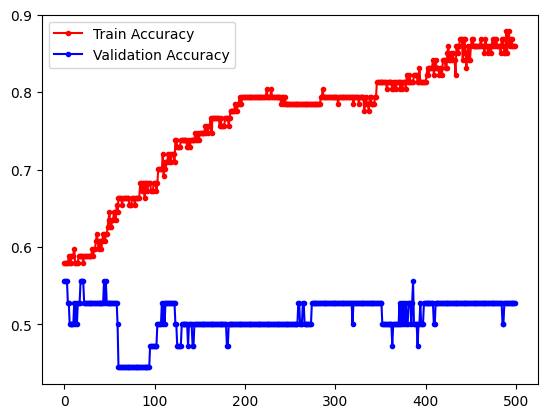

In [ ]:
#loss
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()


Interpret your result

The training loss is decreasing while the validation loss is increasing every epochs. It has wide gap between train loss and validation loss which indicates that the model is overfitting the train data. The training accuracy is increasing that indicates that the model is learning well at training data. On the other hand, the validation accuracy is fluctuating between 50% to 60%.

#### Conclusion

In this activity we successfully demonstrated how to train neural networks with Keras. We use pima-indians-diabetes data set to investigate its characteristic, and it is split into training and testing sets. In the supplementary activity I used happy data set to explore neural networks with two hidden layer and each layer consists of six nodes. I investigate the impact of the hidden layer and hyperparameters such as epochs and learning rate to the model's performance. The analysis of training set and validation set shows that the model is overfitting the data.

Google Colab Link: https://colab.research.google.com/drive/1OMdWPu4xC1RX-siJjpdvyEBoUofAkky5#scrollTo=a5X2aB9x_4at

In [ ]:
!jupyter-nbconvert --to html '/content/drive/MyDrive/Data Science 3/HOA2/Hernandez Hands-on Activity 1.2 - Training Neural Networks.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Data Science 3/HOA2/Hernandez Hands-on Activity 1.2 - Training Neural Networks.ipynb to html
[NbConvertApp] Writing 1216617 bytes to /content/drive/MyDrive/Data Science 3/HOA2/Hernandez Hands-on Activity 1.2 - Training Neural Networks.html
